## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
 - 4.1 How many matches are being played every season?
 - 4.2 Who has won most number of matches?
 - 4.3 Which team has most winning percentage?
 - 4.4 How many runs were scored across the seasons?
 - 4.5 Who were the ORANGE Cap olders in each season?
 - 4.6 Who were the PURPLE Cap olders in each season?
 - 4.7 Which team has hit maximum number of boundaries in the entire IPL?
 - 4.8 Who is the favourite umpire of IPL ?
 - 4.9 Who has won the most Man Of The Match award?
 - 4.10 How is the score distributions for teams in each innings?
 - 4.11 Is Toss winner a Match Winner in IPL T20?
 - 4.12 How many fours and sixes were hit each season?
 - 4.13 How is the run scoring patters for teams in each overs?
 - 4.14 How many times a team has scored and conceeded 200+ runs? 
 - 4.15 How many times a 200+ score has been chases successfully?
 - 4.16 Which batsman has scored most runs in IPL?
 - 4.17 Who are the batsmen with most number of 1s, 2s, 4s and 6s?
 - 4.18 Which batsman has highest individual score in an innings?
 - 4.19 How is the Individual Scores pattern By Top Batsman each Innings?
 - 4.20 What is the average batsman score across seasons?
 - 4.21 How were the batsmen got out mostly?
 - 4.22 Who are top 10 most wicket taking bowlers in IPL?
 - 4.23 Who are top 10 most economic bowler in IPL?
 - 4.24 What is the average economy rate of a bowler?
 - 4.25 How were the different types of extra runs given?
 - 4.26 Which team has won most number of IPL finals?
 - 4.27 Is toss a factor in Final?
5. [Conclusions](#section5)<br/>  

### 1. Problem Statement

I have been given with two datasets __match__ and __delivery__. These contains data of one of the most popular cricket tournament - __Indian Premier League (IPL)__. Anybody who is a cricket Fan should surely try to analyse this dataset as it would help in learning with a fun factor. Here the match dataset contains details of all the match starting from 2008 season to till date - like team names, toss results, winning team, man of the match, and umpires. The other dataset - delivery contains ball by ball details of all the match. Here, I will load these datasets first, then after doing pandas profiling and preprocessing on them, I have analyzed and interpreted a few interesting facts one by one. I have also tried to predict a few outcomes from the result of the past matches given in the dataset.


### 2. Data Loading and Description

We have the Indian Premier League data from 2008 to 2018. We have two CSV files to begin with. Matches - giving us details of each match played. Deliveries - all the deliveries in all the matches put together. We would work on these two files to extract data on each match, batsmen and bowlers.

#### Some Background Information
__The Indian Premier League__ (IPL) is a professional Twenty20 cricket league in India contested during April and May of every year by teams representing Indian cities and some states. The league was founded by the Board of Control for Cricket in India (__BCCI__) in 2008. The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. There have been ten seasons of the IPL tournament

#### Importing packages                                          

In [1]:
#import all required packages
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output

#### Importing the Dataset

In [2]:
match_df=pd.read_csv("matches.csv")
deliveries_df=pd.read_csv("deliveries.csv")

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [3]:
# This will print the number of rows and comlumns of the Data Frame
print(match_df.shape)       #match data has 696 rows and 12 columns
print(deliveries_df.shape)  #delivery data has 164750 rows and 21 columns


(696, 18)
(164750, 21)


In [4]:
match_df.head(2)          #understand the data present in file match

id  season       city        date                team1  \
0   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06       Mumbai Indians   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   

   result  dl_applied                  winner  win_by_runs  win_by_wickets  \
0  normal           0     Sunrisers Hyderabad           35               0   
1  normal           0  Rising Pune Supergiant            0               7   

  player_of_match                                      venue         umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   

    umpire2 umpire3  
0  NJ Llong     NaN  
1    S Ravi     NaN

In [5]:
deliveries_df.head(2)       #understand the data present in file delivery

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over   ...    bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0   ...           0   
1     2  DA Warner    S Dhawan  TS Mills              0   ...           0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  

[2 rows x 21 columns]

In [6]:
match_df.info()                            # This will give Index, Datatype and Memory information of match 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [7]:
deliveries_df.info()                         # This will give Index, Datatype and Memory information of delivery 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
match_id            164750 non-null int64
inning              164750 non-null int64
batting_team        164750 non-null object
bowling_team        164750 non-null object
over                164750 non-null int64
ball                164750 non-null int64
batsman             164750 non-null object
non_striker         164750 non-null object
bowler              164750 non-null object
is_super_over       164750 non-null int64
wide_runs           164750 non-null int64
bye_runs            164750 non-null int64
legbye_runs         164750 non-null int64
noball_runs         164750 non-null int64
penalty_runs        164750 non-null int64
batsman_runs        164750 non-null int64
extra_runs          164750 non-null int64
total_runs          164750 non-null int64
player_dismissed    8157 non-null object
dismissal_kind      8157 non-null object
fielder             5918 non-null object
dtype

In [8]:
match_df.describe()

id       season  dl_applied  win_by_runs  win_by_wickets
count   696.000000   696.000000  696.000000   696.000000      696.000000
mean    974.103448  2012.965517    0.027299    13.472701        3.349138
std    2143.239623     3.069266    0.163070    23.607994        3.411398
min       1.000000  2008.000000    0.000000     0.000000        0.000000
25%     174.750000  2010.000000    0.000000     0.000000        0.000000
50%     348.500000  2013.000000    0.000000     0.000000        3.000000
75%     522.250000  2016.000000    0.000000    19.000000        6.000000
max    7953.000000  2018.000000    1.000000   146.000000       10.000000

In [9]:
match_df.isnull().sum()       #how many null values present in match data

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

From the above output we can see that __city__ and __umpire3__ columns contains __many null values__. We will see how to deal with them.

In [10]:
deliveries_df.isnull().sum()       #how many null values present in delivery data

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    156593
dismissal_kind      156593
fielder             158832
dtype: int64

From the above output we can see that __player_dismissed__, __dismissal_kind__ and __fielder__ columns contains __many null values__. This is because these fields are having values only when a batsman is out, and not in every ball a batsman gets out.

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [11]:
#Pre Profiling matches
profile = pandas_profiling.ProfileReport(match_df)
profile.to_file(outputfile="match_date_before_preprocessing.html")

In [12]:
#Pre Profiling deliveries
profile = pandas_profiling.ProfileReport(deliveries_df)
profile.to_file(outputfile="deliveris_date_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our datasets, so we have named the html file as __match_data_before_preprocessing.html__ and __delivery_data_before_preprocessing.html__. Lets take a look at the file and see what useful insight we can develop from it. <br/>
Now we will process our data to better understand it.

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Replacing missing entries of __city__ in match data
    - Replacing missing values of __umpire1__ and __umpire2__ with their mode values.
    - Dropping the column __'umpire3'__ in match data as it has too many _null_ values.
    - Removing duplicates in delivery data.
    - Replacing the missing values of delivery.__dismissal_kind__.
    - Replacing team names by their respective abbreviations.

In [13]:
match_df[match_df['city'].isnull()]          #check rows where city is null

id  season city        date                        team1  \
461  462    2014  NaN  2014-04-19               Mumbai Indians   
462  463    2014  NaN  2014-04-19        Kolkata Knight Riders   
466  467    2014  NaN  2014-04-23          Chennai Super Kings   
468  469    2014  NaN  2014-04-25          Sunrisers Hyderabad   
469  470    2014  NaN  2014-04-25               Mumbai Indians   
474  475    2014  NaN  2014-04-28  Royal Challengers Bangalore   
476  477    2014  NaN  2014-04-30          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
461  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
462             Delhi Daredevils        Kolkata Knight Riders           bat   
466             Rajasthan Royals             Rajasthan Royals         field   
468             Delhi Daredevils          Sunrisers Hyderabad           bat   
469          Chennai Super Kings               Mumbai Indians           bat   
474              Kings XI Punjab              Kings XI Punjab         field   
476               Mumbai Indians               Mumbai Indians         field   

     result  dl_applied                       winner  win_by_runs  \
461  normal           0  Royal Challengers Bangalore            0   
462  normal           0             Delhi Daredevils            0   
466  normal           0          Chennai Super Kings            7   
468  normal           0          Sunrisers Hyderabad            4   
469  normal           0          Chennai Super Kings            0   
474  normal           0              Kings XI Punjab            0   
476  normal           0          Sunrisers Hyderabad           15   

     win_by_wickets player_of_match                                venue  \
461               7        PA Patel  Dubai International Cricket Stadium   
462               4       JP Duminy  Dubai International Cricket Stadium   
466               0       RA Jadeja  Dubai International Cricket Stadium   
468               0        AJ Finch  Dubai International Cricket Stadium   
469               7       MM Sharma  Dubai International Cricket Stadium   
474               5  Sandeep Sharma  Dubai International Cricket Stadium   
476               0         B Kumar  Dubai International Cricket Stadium   

             umpire1         umpire2 umpire3  
461        Aleem Dar    AK Chaudhary     NaN  
462        Aleem Dar     VA Kulkarni     NaN  
466  HDPK Dharmasena  RK Illingworth     NaN  
468        M Erasmus          S Ravi     NaN  
469        BF Bowden       M Erasmus     NaN  
474        BF Bowden          S Ravi     NaN  
476  HDPK Dharmasena       M Erasmus     NaN

It seems all mimatches with missing city were played in Dubai International Stadium, Hence, we should replace city name as Dubai

In [14]:
match_df['city'].fillna('Dubai',inplace=True)       #replace null value city with Dubai as all were played in Dubai stadium

In [15]:
#Fill NaN values of umpire1/2 with their mode values
match_df.umpire1 = match_df.umpire1.fillna(match_df['umpire1'].mode()[0]) 
match_df.umpire2 = match_df.umpire2.fillna(match_df['umpire2'].mode()[0])

In [16]:
match_df.drop('umpire3',axis=1,inplace=True)      #drop column umpire3

In [17]:
deliveries_df.drop_duplicates(keep='first', inplace=True)     #dropping the duplicates from delivery data

In [18]:
deliveries_df['dismissal_kind'].fillna('Not Applicable',inplace=True)     #Replacing the missing values of deliveries.dismissal_kind

In [19]:
#changing team names by their short names
match_df.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS'],inplace = True)

deliveries_df.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS'],inplace = True)

In [20]:
# check null values of column winner in match data
match_df[match_df['winner'].isnull()]

id  season       city        date team1 team2 toss_winner toss_decision  \
300  301    2011      Delhi  2011-05-21    DD    PW          DD           bat   
545  546    2015  Bangalore  2015-04-29   RCB    RR          RR         field   
570  571    2015  Bangalore  2015-05-17    DD   RCB         RCB         field   

        result  dl_applied winner  win_by_runs  win_by_wickets  \
300  no result           0    NaN            0               0   
545  no result           0    NaN            0               0   
570  no result           0    NaN            0               0   

    player_of_match                  venue          umpire1       umpire2  
300             NaN       Feroz Shah Kotla        SS Hazare     RJ Tucker  
545             NaN  M Chinnaswamy Stadium        JD Cloete     PG Pathak  
570             NaN  M Chinnaswamy Stadium  HDPK Dharmasena  K Srinivasan

It seems that null values of winner column are valid, hence we won't modify them

## 3.4 Post Pandas Profiling

In [21]:
#Post Profiling of match data
profile = pandas_profiling.ProfileReport(match_df)
profile.to_file(outputfile="match_data_after_preprocessing.html")

In [22]:
#Post Profiling of delivery data
profile = pandas_profiling.ProfileReport(deliveries_df)
profile.to_file(outputfile="delivery_data_after_preprocessing.html")

In [23]:
match_df.isnull().sum()    #check null of match data values after Pre-Processing

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            0
umpire2            0
dtype: int64

In [24]:
deliveries_df.isnull().sum()    #check null of delivery data values after Pre-Processing

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    156588
dismissal_kind           0
fielder             158827
dtype: int64

Now we have preprocessed the data, now the dataset doesnot contain inappropriate. We don't have any duplicate rows in the dataset, and we have also removed an unnecessary column. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. Two post profiling reports are generated i.e __match_after_preprocessing.html__ and __delivery_after_preprocessing.html__.<br/>

Now, lets go through below questions to get hidden insight of the datasets.


### 4. Questions

### 4.1 How many matches are being played every season?


Lets see if there is any reason why number of matches were higher in 2011/2012/2013

Text(0.5, 1.0, 'NUMBER OF MATCHES EACH SEASON')

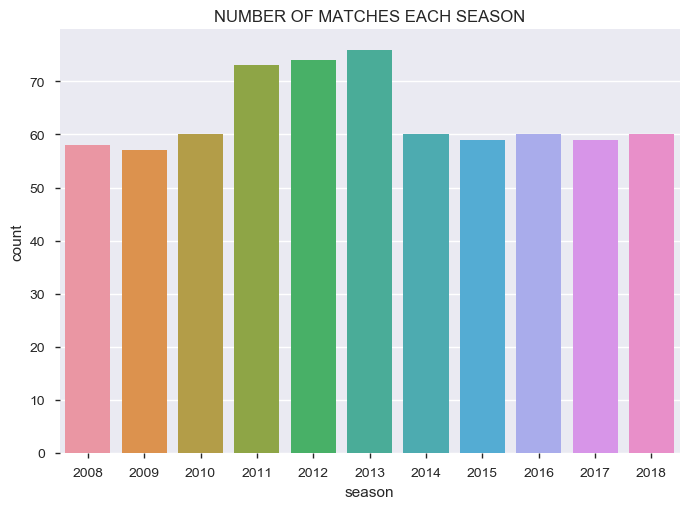

In [25]:
sns.countplot(x = 'season', data = match_df ).set_title("NUMBER OF MATCHES EACH SEASON")

Text(0.5, 1.0, 'NUMBER OF TEAMS EACH SEASON')

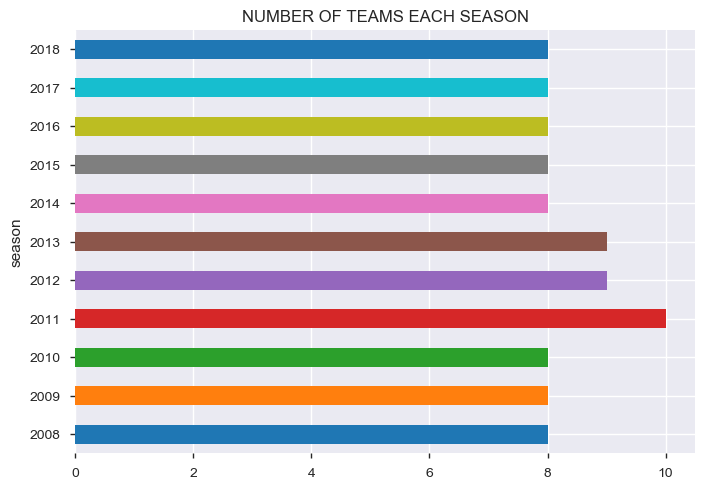

In [26]:
match_df.groupby(['season'])['team1'].nunique().plot.barh().set_title("NUMBER OF TEAMS EACH SEASON")

We can see that number of teams participated in year 2011,2012,2013 were higher, so number of matches were higher too

### 4.2 Who has won most number of matches?

Text(0.5, 1.0, 'Number of matches won by Each Team')

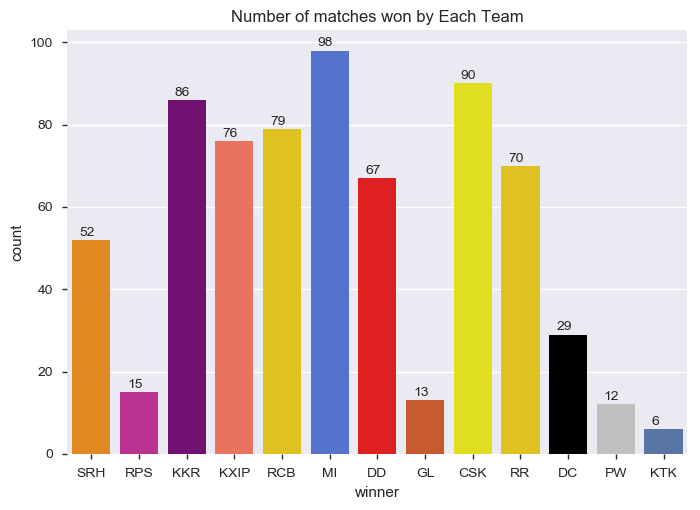

In [27]:
ax=sns.countplot(x = 'winner', data = match_df, palette = ['darkorange','#d11d9b','purple',
                                                       'tomato','gold','royalblue','red','#e04f16','yellow','gold'
                                                       ,'black','silver','b'] )
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
ax.set_title("Number of matches won by Each Team")

 - By this graph we can see that Mumbai Indians have won most of the matches in the IPL.
 - Mumbai indians have most number of wins but in true fact chennai has most number of wins as it was banned from IPL for 2 years __P.S- Fan of chennai__ :)

### 4.3 Which team has most winning percentage?

Text(0.5, 1.0, 'WIN PERCENTAGE OF TEAMS')

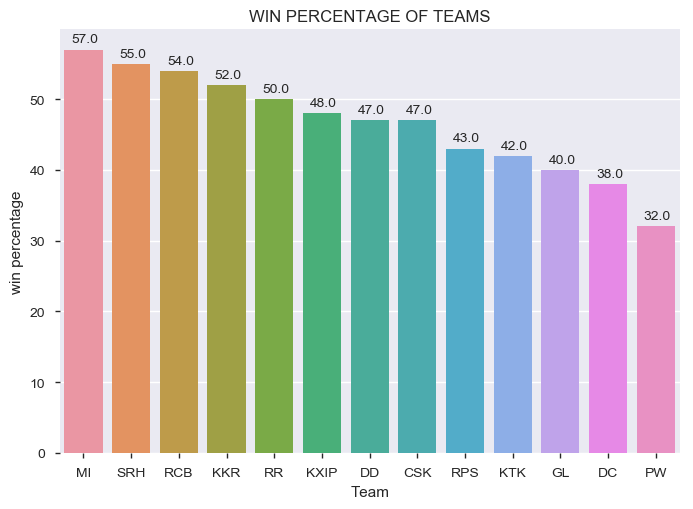

In [28]:
matches_played_byteams=pd.concat([match_df['team1'],match_df['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['win']=match_df['winner'].value_counts().reset_index()['winner']
matches_played_byteams['win percentage']=matches_played_byteams['win']/matches_played_byteams['Total Matches'] * 100
matches_played_byteams=matches_played_byteams[['Team','win percentage']]
matches_played_byteams=matches_played_byteams.astype({'win percentage' : int})
#df.astype({"a": int, "b": complex})
matches_played_byteams.sort_values('win percentage', ascending=False, inplace=True)
ax=sns.barplot(x='Team', y='win percentage', data= matches_played_byteams )
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
ax.set_title('WIN PERCENTAGE OF TEAMS')

### 4.4 How many runs were scored across the seasons?

Text(0.5, 1.0, 'TOTAL RUNS ACROSS SEASONS ')

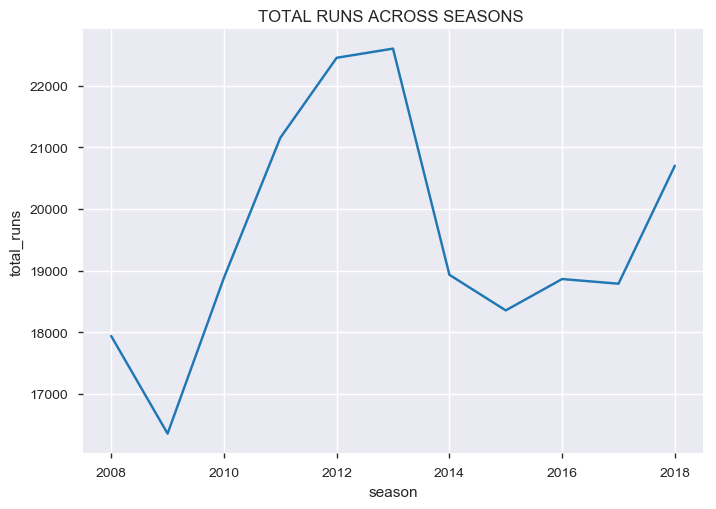

In [29]:
batsmen = match_df[['id','season']].merge(deliveries_df, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season = batsmen.groupby(['season'])['total_runs'].sum().reset_index()
ax=sns.lineplot(x = 'season', y = 'total_runs', data = season,palette='spring')
ax.set_title('TOTAL RUNS ACROSS SEASONS ')

 - In the year 2012, 2013 there was heavy rainfall of runs in IPL

### 4.5 Who were the ORANGE Cap holders in each season?

Text(0.5, 1.0, 'ORANGE CAP HOLDERS \n')

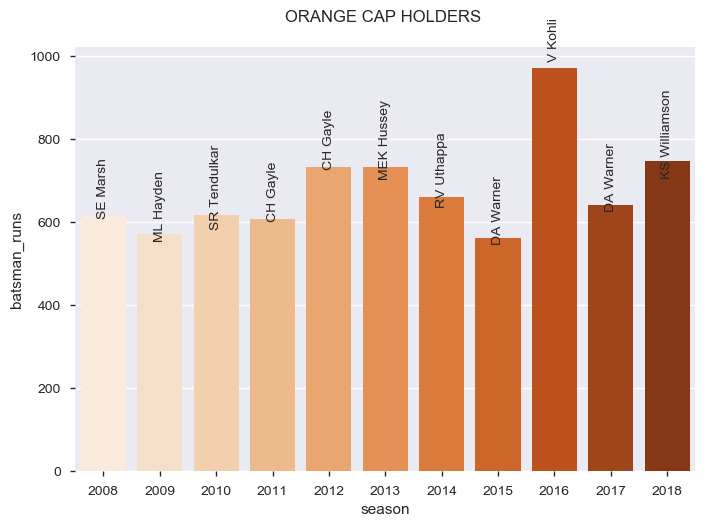

In [30]:
orange_cap = match_df[['id','season']]
orange_cap = orange_cap.merge(deliveries_df,left_on = 'id', right_on = 'match_id')
orange_cap = orange_cap.groupby(['batsman','season'])['batsman_runs'].sum().reset_index()
orange_cap = orange_cap.sort_values('batsman_runs',ascending=False)
orange_cap = orange_cap.drop_duplicates(subset = ['season'],keep = 'first')
ax=sns.barplot(x = 'season', y = 'batsman_runs', data = orange_cap,palette= 'Oranges')
i = 0
for p in ax.patches:
    l = list(orange_cap.sort_values('season')['batsman'])[i]
    ax.annotate(l, (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', rotation=90, xytext=(0, 20), textcoords='offset points')
    i = i + 1
ax.set_title('ORANGE CAP HOLDERS \n')

### 4.6 Who were the PURPLE Cap holders in each season?


Text(0.5, 1.0, 'PURPLE CAP HOLDERS \n')

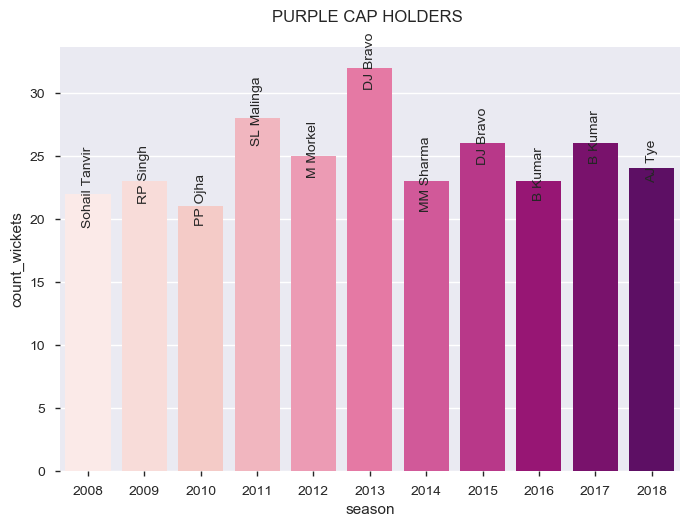

In [31]:
types_of_dismissal = [ 'caught', 'bowled', 'lbw', 'caught and bowled','stumped',  'hit wicket']
purple_cap = deliveries_df[deliveries_df['dismissal_kind'].isin(types_of_dismissal)]
purple_cap = purple_cap.merge(match_df,left_on='match_id', right_on = 'id')
purple_cap = purple_cap.groupby(['season','bowler'])['dismissal_kind'].count().reset_index()
purple_cap = purple_cap.sort_values('dismissal_kind',ascending = False)
purple_cap = purple_cap.drop_duplicates('season',keep = 'first').sort_values(by='season')
purple_cap.columns=['season','bowler','count_wickets']
ax=sns.barplot(x = 'season', y = 'count_wickets', data = purple_cap, palette = 'RdPu')
i = 0
for p in ax.patches:
    l = list(purple_cap.sort_values('season')['bowler'])[i]
    ax.annotate(l, (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', rotation=90, xytext=(0, 5), textcoords='offset points')
    i = i + 1
ax.set_title('PURPLE CAP HOLDERS \n')

### 4.7 Which team has hit maximum number of boundaries in the entire IPL?

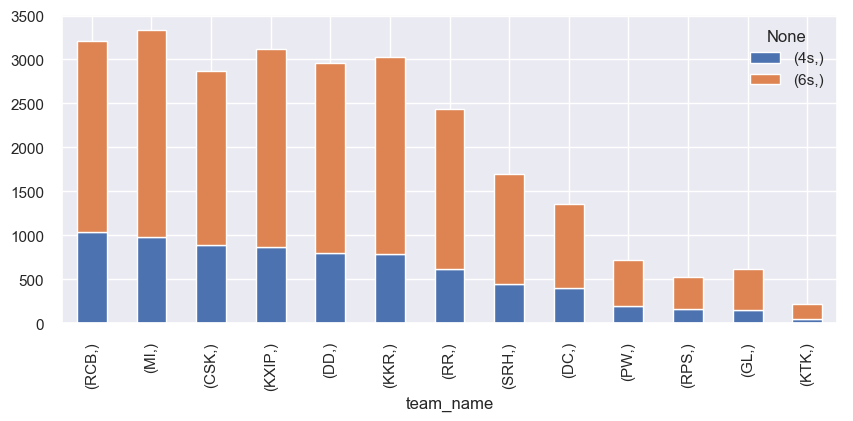

In [32]:
sixes = deliveries_df[deliveries_df['batsman_runs'] == 6]['batting_team'].value_counts().reset_index()
fours = deliveries_df[deliveries_df['batsman_runs'] == 4]['batting_team'].value_counts().reset_index()
scores = sixes.merge(fours,left_on = 'index', right_on = 'index')
scores.columns = [['team_name','4s','6s']]
sns.set()
scores.set_index('team_name').plot(kind = 'bar',stacked = True, figsize=(10,4) )

### 4.8 Who is the favourite umpire of IPL ?

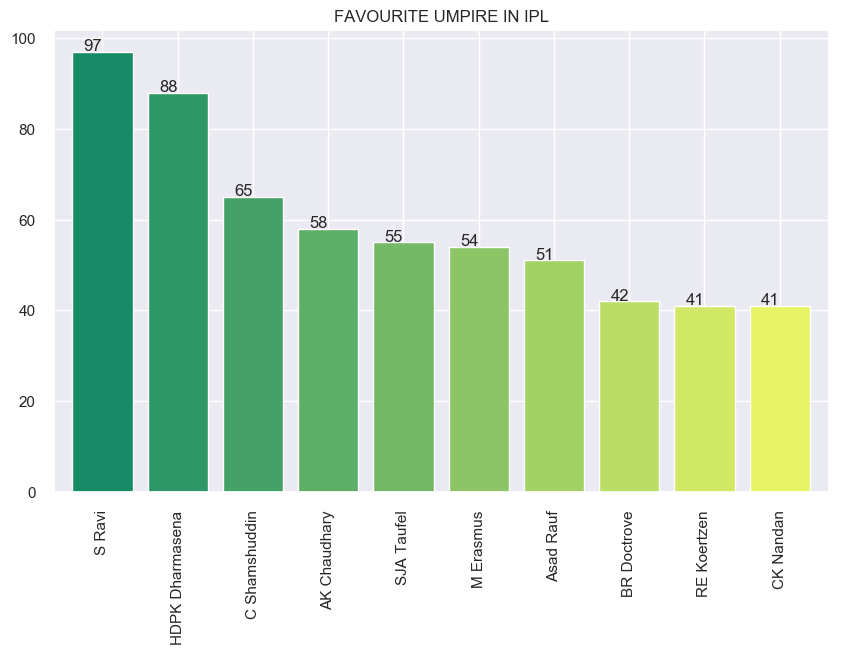

In [33]:
plt.subplots(figsize=(10,6))
ump=pd.concat([match_df['umpire1'],match_df['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('summer',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
ax.set_title("FAVOURITE UMPIRE IN IPL" )
plt.show()

### 4.9 Who has won the most Man Of The Match award?

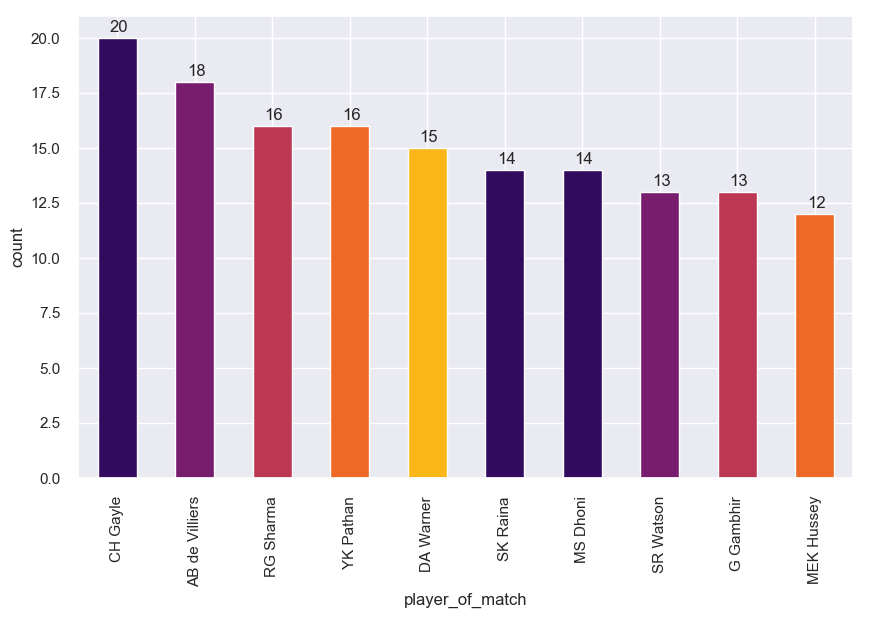

In [34]:
plt.subplots(figsize=(10,6))
ax = match_df['player_of_match'].value_counts().head(10).plot.bar(width=.5, color=sns.color_palette('inferno',5))  
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

### 4.10 How is the score distributions for teams in each innings?

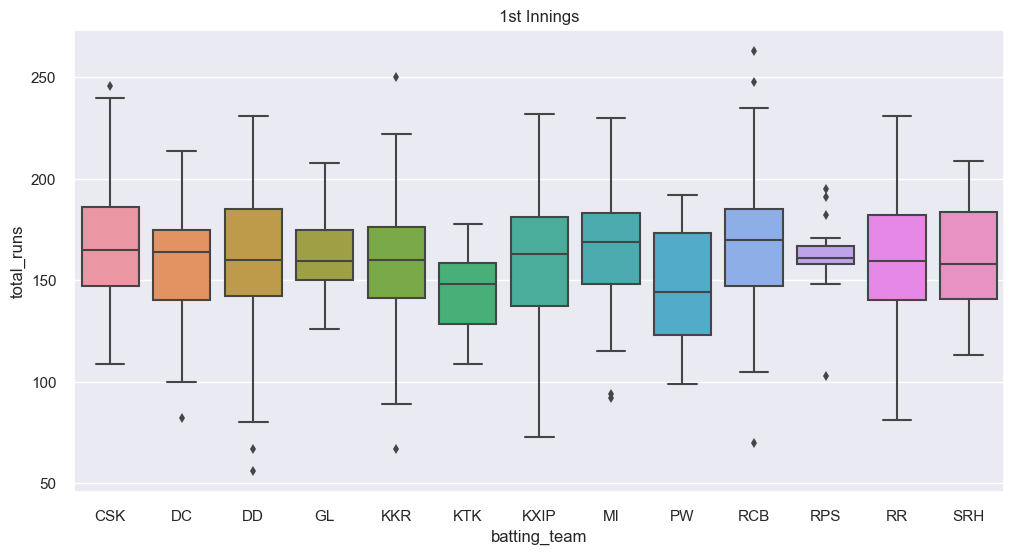

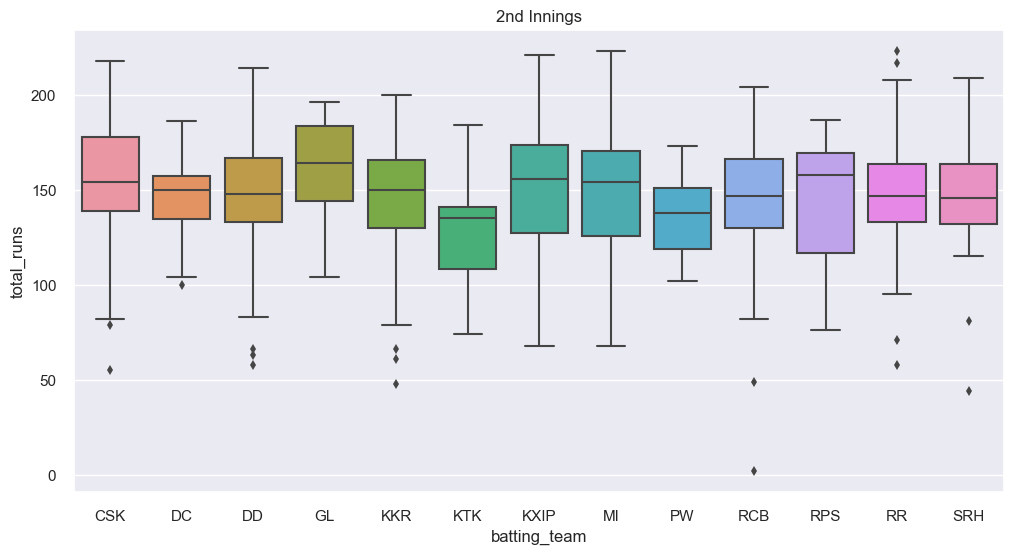

In [35]:
plt.subplots(figsize=(12,6))
xyz=deliveries_df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning=xyz[xyz['inning']==1]
score_2_inning=xyz[xyz['inning']==2]
sns.boxplot(x='batting_team',y='total_runs',data=score_1_inning).set_title('1st Innings')
plt.show()
sns.boxplot(x='batting_team',y='total_runs',data=score_2_inning).set_title('2nd Innings')
fig=plt.gcf()
fig.set_size_inches(12,6)

 - According to Graph 1 the batting by CSK in innings 1 looks to be the best. Graph 2 also conveys the same story.
 - In Graph 2 we see a point near 0 which may seem to be outlier. But it is so because the match was disrupted.

### 4.11 Is Toss winner a Match Winner in IPL T20?

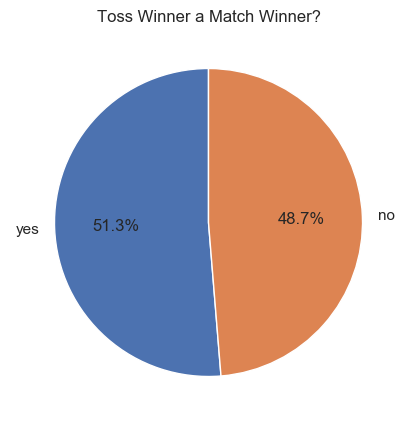

In [36]:
df=match_df[match_df['toss_winner']==match_df['winner']]
slices=[len(df),(len(match_df)-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels, startangle=90,autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title("Toss Winner a Match Winner?")
plt.show()

 - As the pie chart shows the probability of winning the match after winning the toss is almost 50-50 , we can't conclude that toss wins a match in IPL.

### 4.12 How many fours and sixes were hit each season?

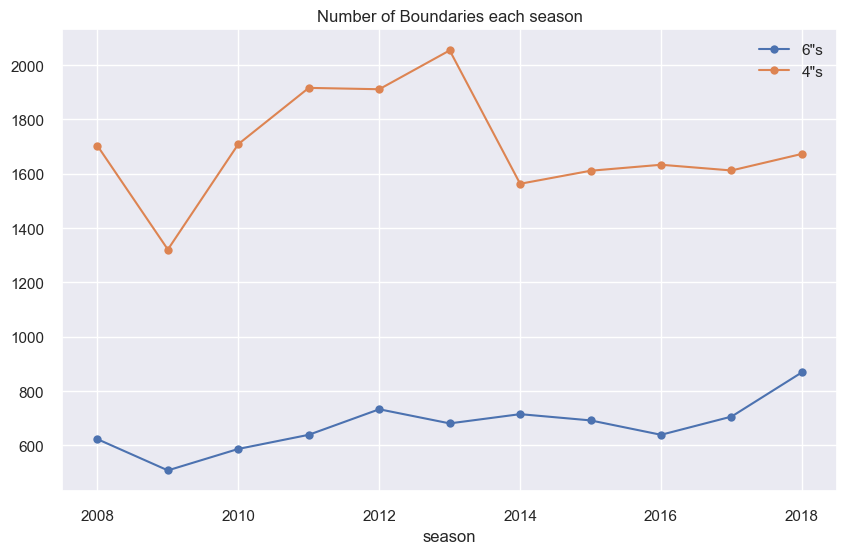

In [37]:
batsmen = match_df[['id','season']].merge(deliveries_df, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title("Number of Boundaries each season")
plt.show()

### 4.13 How is the run scoring patters for teams in each overs?

In [38]:
matches_played_byteams=pd.concat([match_df['team1'],match_df['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=match_df['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)
#matches_played_byteams['win %age']=matches_played_byteams['wins']//

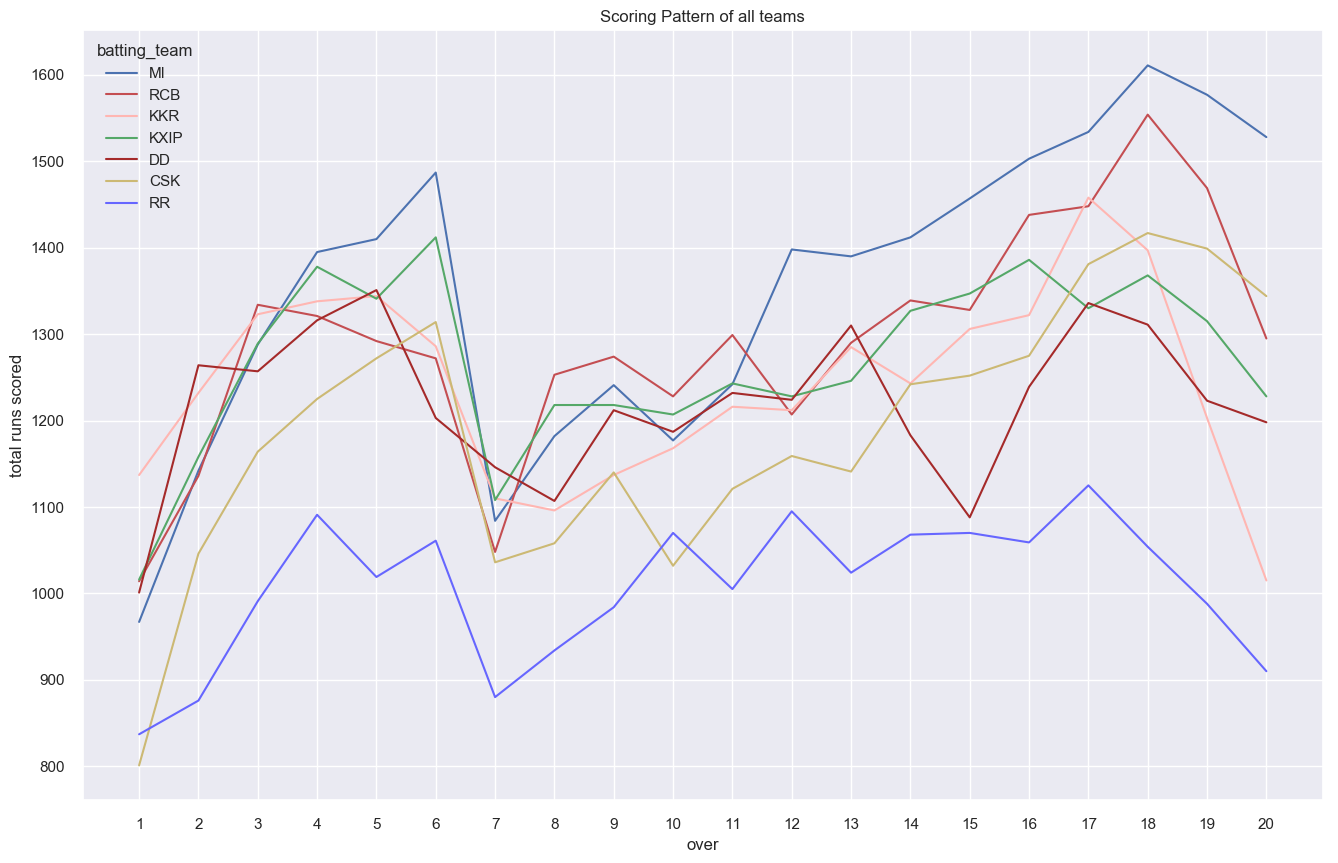

In [39]:
runs_per_over = deliveries_df.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>100].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.title("Scoring Pattern of all teams")
plt.show()
#runs_per_over

 - Maximum runs are being scored in the last 5 overs of the match. MI and RCB have shown a incresing trend in the runs scored throughout the match.

### 4.14 How many times a team has scored and conceded 200+ runs? 

In [40]:
high_scores=deliveries_df.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

match_id  inning batting_team bowling_team  total_runs
829        411       1          RCB           PW         263
1370      7937       1          KKR         KXIP         250
1250       620       1          RCB           GL         248
416        206       1          CSK           RR         246
122         61       1          CSK         KXIP         240
1134       562       1          RCB           MI         235
596        296       1         KXIP          RCB         232
522        259       1           DD         KXIP         231
981        486       1         KXIP          CSK         231
1304      7904       1           RR          RCB         231

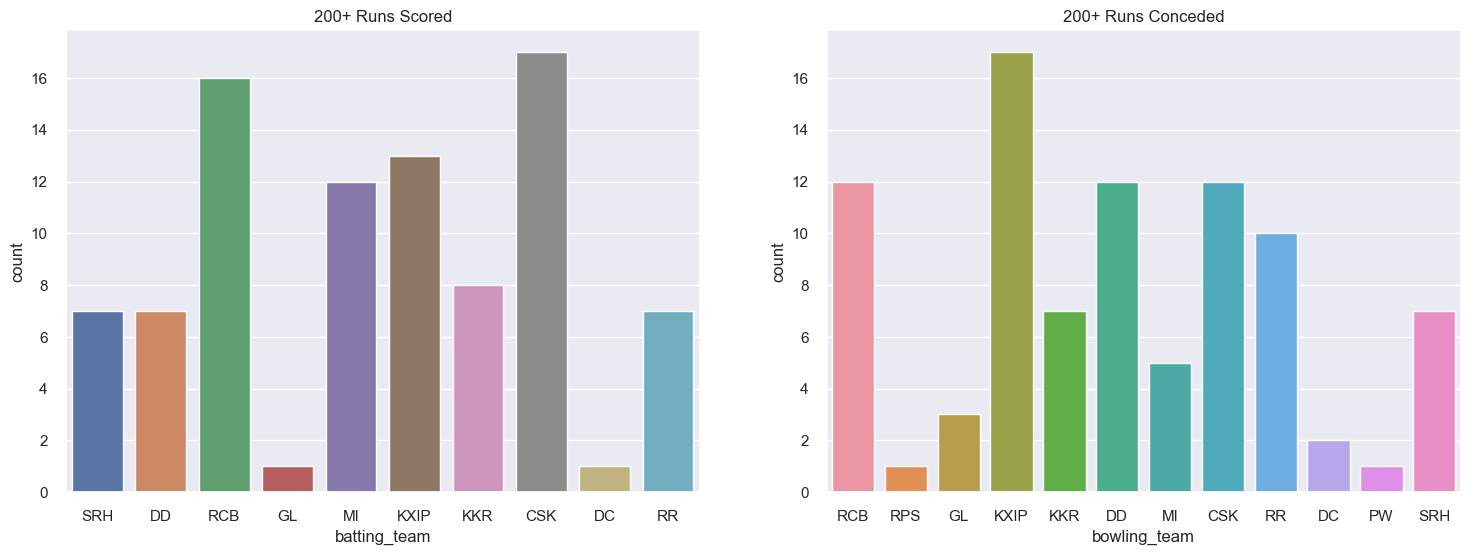

In [41]:
fig, ax =plt.subplots(1,2)
sns.countplot(high_scores['batting_team'],ax=ax[0]).set_title("200+ Runs Scored")
sns.countplot(high_scores['bowling_team'],ax=ax[1]).set_title("200+ Runs Conceded")
fig.set_size_inches(18,6)
plt.show()

### 4.15 How many times a 200+ score has been chases successfully?

In [42]:
high_scores=deliveries_df.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_score_chased']=1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 
                                           'yes', 'no')
high_scores1.head()

match_id  inning_1 batting_team bowling_team  inning1_runs  inning_2  \
0          1         1          SRH          RCB           207         2   
8          9         1           DD          RPS           205         2   
19        20         1          RCB           GL           213         2   
31        32         1          SRH         KXIP           207         2   
35        36         1          SRH          KKR           209         2   

    inning2_runs is_score_chased  
0            172              no  
8            108              no  
19           192              no  
31           181              no  
35           161              no

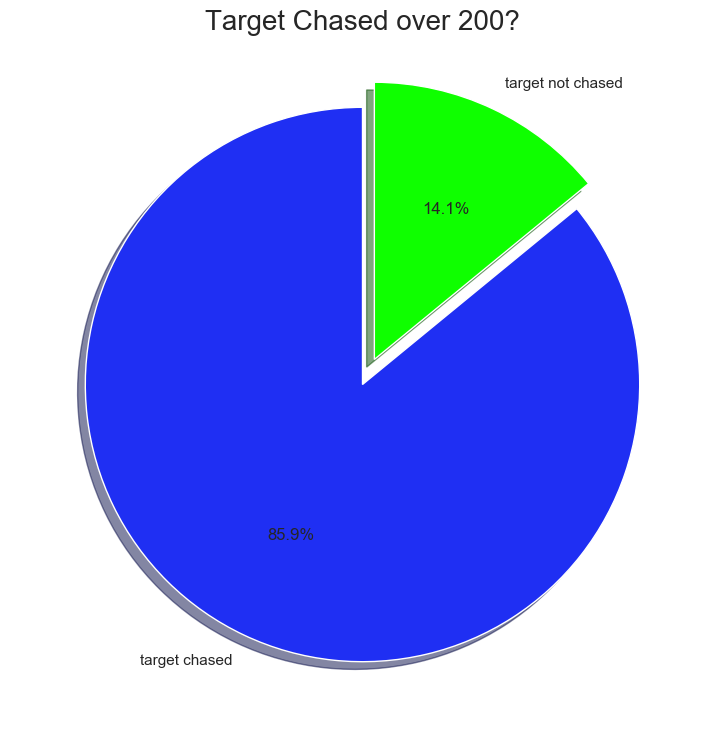

In [56]:
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased
list(slices)
labels=['target chased','target not chased']
plt.pie(slices,labels=labels,colors=['#1f2ff3', '#0fff00'],startangle=90,shadow=True,explode=(0,0.1),autopct='%1.1f%%')
plt.title("Target Chased over 200?",fontsize=20)
plt.show()

 - It seems that probability of winning a match after scoring 200 runs is very high.

### 4.16 Which batsman has scored most runs in IPL?

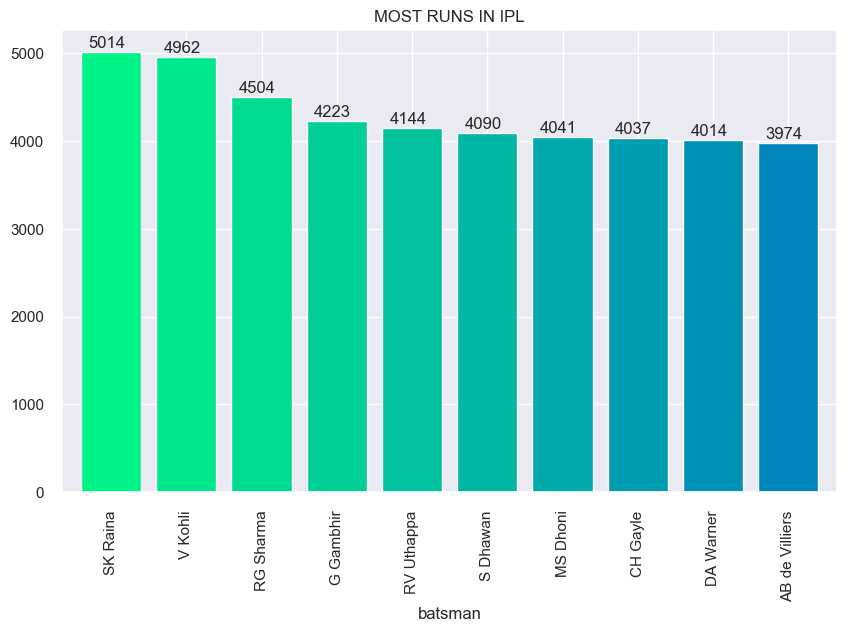

In [44]:
plt.subplots(figsize=(10,6))
max_runs=deliveries_df.groupby(['batsman'])['batsman_runs'].sum()
#max_runs.sort_values(ascending=False).head(10).plot.bar()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
ax.set_title("MOST RUNS IN IPL")
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()


### 4.17 Who are the batsmen with most number of 1s, 2s, 4s and 6s?

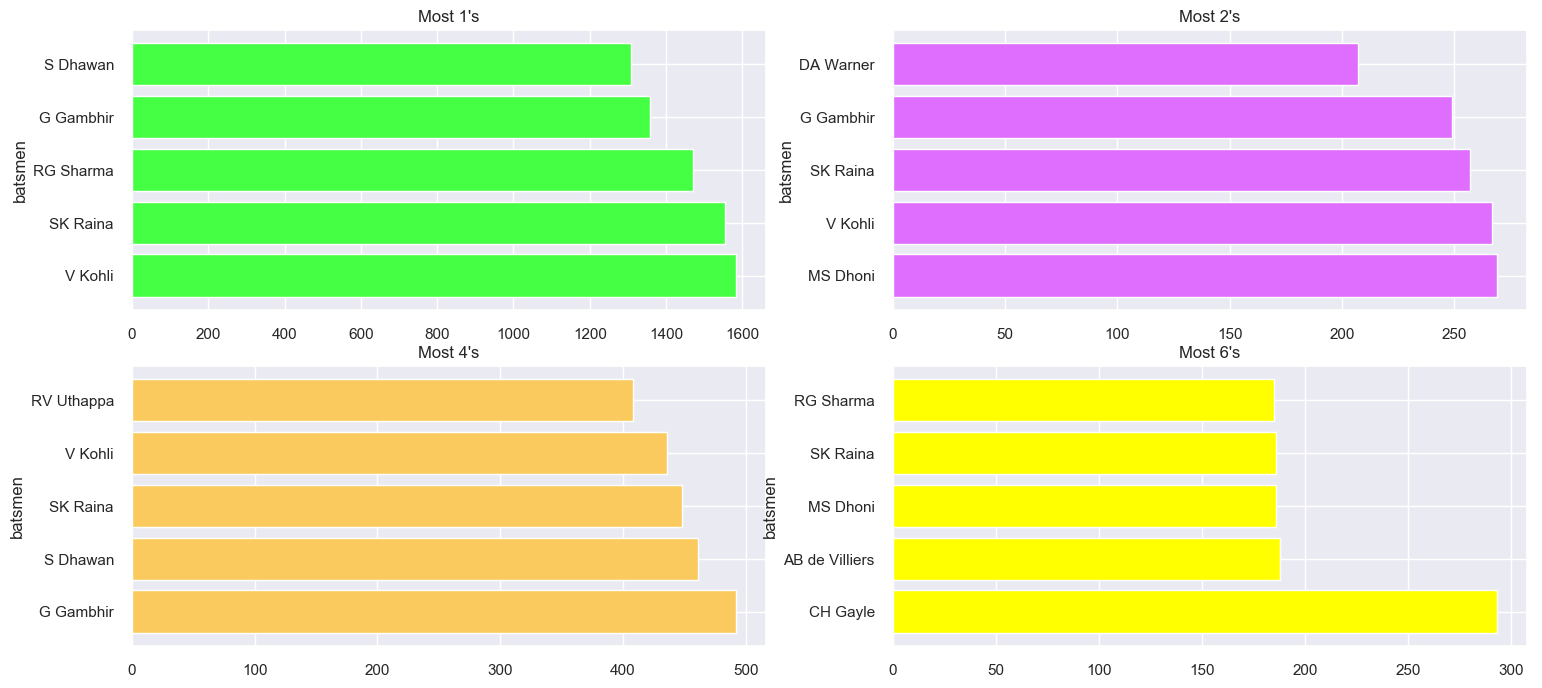

In [45]:
toppers=deliveries_df.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=plt.subplots(2,2,figsize=(18,8))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('batsmen')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('batsmen')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('batsmen')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('batsmen')
plt.show()

__Observations:__

 - Kohli has scored the maximum 1's
 - Dhoni has the maximum 2's . Those Strong Legs :p
 - Gambhir has the maximum 4's.
 - C Gayle has the maximum 6's and he leads by a big margin.

### 4.18 Which batsman has highest individual score in an innings?

In [46]:
top_scores = deliveries_df.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scores.nlargest(10,'batsman_runs')


match_id         batsman batting_team  batsman_runs
6200        411        CH Gayle          RCB           175
900          60     BB McCullum          KKR           158
8426        562  AB de Villiers          RCB           133
10149      7935         RR Pant           DD           130
9257        620  AB de Villiers          RCB           129
5585        372        CH Gayle          RCB           128
3135        206         M Vijay          CSK           127
529          36       DA Warner          SRH           126
7752        516        V Sehwag         KXIP           122
10417      7953       SR Watson          CSK           121

### 4.19 How is the Individual Scores pattern By Top Batsman each Innings?

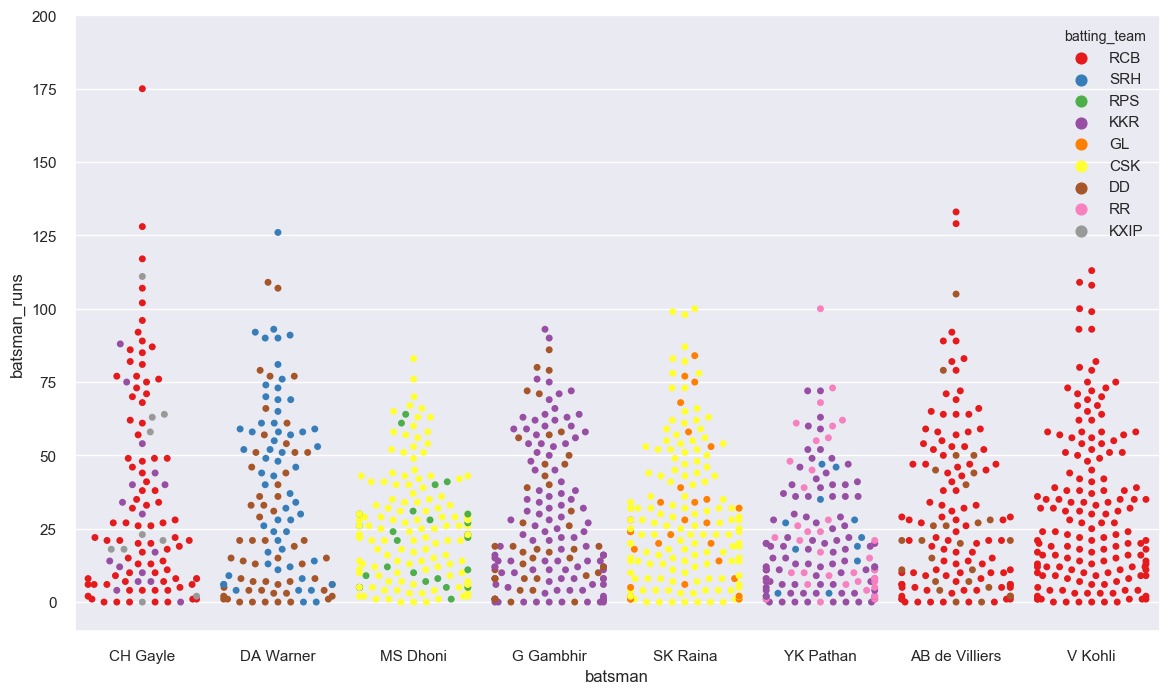

In [47]:
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = deliveries_df.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
fig=plt.gcf()
fig.set_size_inches(14,8)
plt.ylim(-10,200)
plt.show()


__Observations:__

 - Chris Gayle has the highest Individual Score of 175 and Highest Number of Centuries i.e 5
 - MS Dhoni and Gautam Gambhir have never scored a Century.
 - V Kohli has played only for 1 IPL Team in all seasons i.e RCB

### 4.20 What is the average batsman score across seasons?

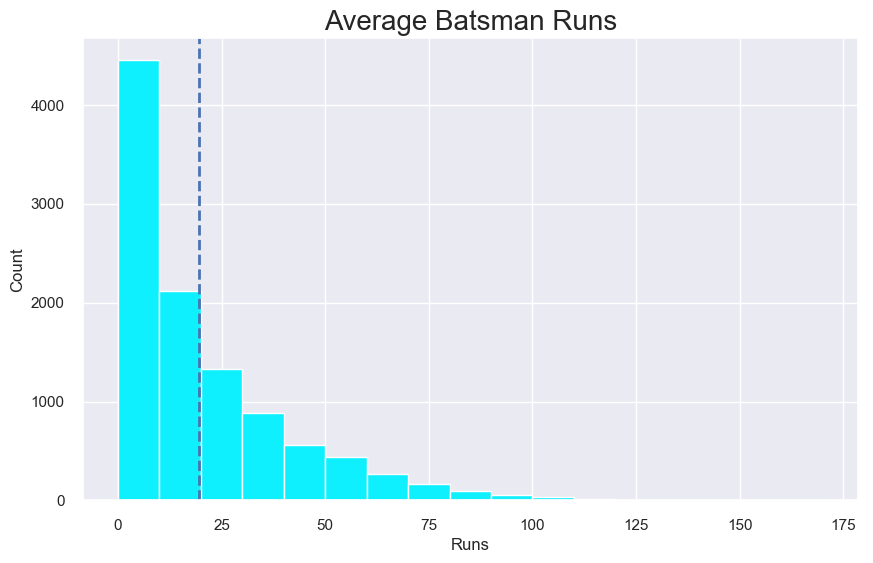

In [48]:
plt.subplots(figsize=(10,6))
bins=range(0,180,10)
plt.hist(top_scores["batsman_runs"],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
plt.xlabel('Runs')
plt.ylabel('Count')
plt.axvline(top_scores["batsman_runs"].mean(), color='b', linestyle='dashed', linewidth=2)
plt.title("Average Batsman Runs",fontsize=20)
plt.plot()
plt.show()

 - The average score for a batsman is around 19-20. Also the number of single digit score is quite high and the number of centuries is low.

### 4.21 How were the batsmen got out mostly?

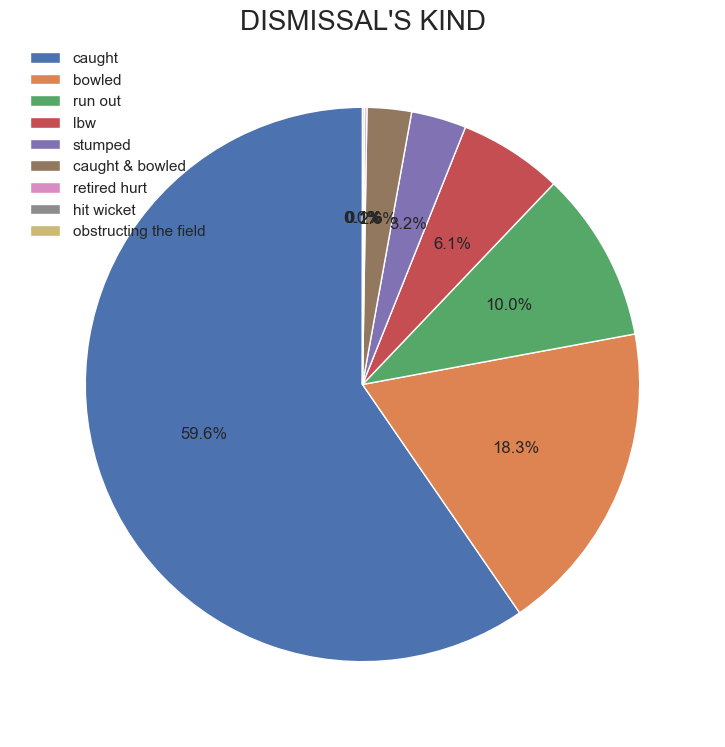

In [49]:
OutType=deliveries_df
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 9
OutType['dismissal_kind'].fillna('Not Applicable', inplace=True)
OutType=OutType[OutType['dismissal_kind'] != 'Not Applicable']
value=OutType['dismissal_kind'].value_counts()
labels=['caught','bowled','run out','lbw','stumped','caught & bowled','retired hurt','hit wicket','obstructing the field']
plt.pie(value,startangle=90, autopct='%.1f%%')
plt.legend(labels, loc="upper left")
plt.title("DISMISSAL'S KIND",fontsize=20)
plt.show()

 - It seems that most of the batsmen got caught out.

### 4.22 Who are top 10 most wicket taking bowlers in IPL?

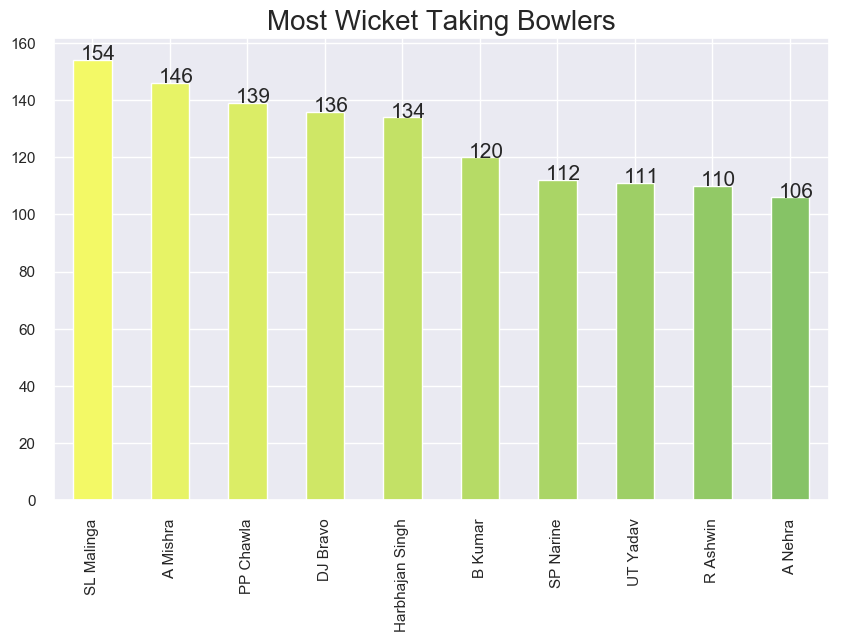

In [50]:
plt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=deliveries_df[deliveries_df["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.5,color=sns.color_palette('summer_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
plt.title("Most Wicket Taking Bowlers",fontsize=20)
plt.show()

### 4.23 Who are top 10 most economic bowler in IPL?

In [51]:
eco=deliveries_df.groupby(['bowler']).sum()
eco['total balls']=deliveries_df['bowler'].value_counts()
eco['overs']=(eco['total balls']//6)
eco['economy']=(eco['total_runs']/(eco['overs']))
eco[(eco['overs']>300)].sort_values('economy')[:10].economy.reset_index().T

0          1         2           3                4        5  \
bowler   DW Steyn  SP Narine  R Ashwin  SL Malinga  Harbhajan Singh  B Kumar   
economy    6.6156    6.63824   6.68539     6.75724           7.0283  7.12564   

                6        7        8        9  
bowler   A Mishra  PP Ojha   Z Khan  P Kumar  
economy   7.32787  7.40432  7.54617  7.61276

### 4.24 How were the different types of extra runs given?

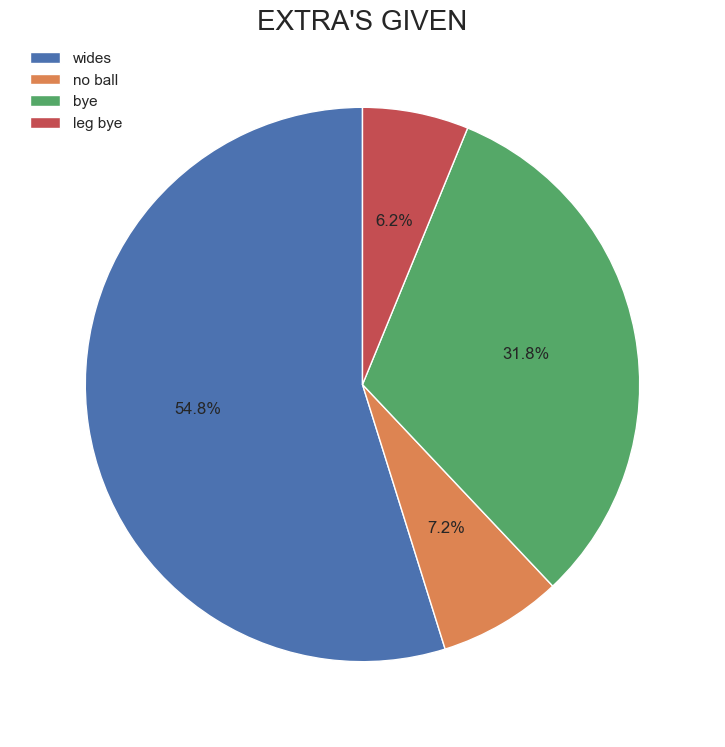

In [52]:
labels=['wides','no ball','bye','leg bye']
extras=deliveries_df.loc[:,'wide_runs':'noball_runs']
plt.pie(extras.sum(),startangle=90, autopct='%.1f%%')
plt.legend(labels, loc="upper left")
plt.title("EXTRA'S GIVEN",fontsize=20)
plt.show()

 - It seems wides runs are the most in the extra run categories.

### 4.25 What is the average economy rate of a bowler?

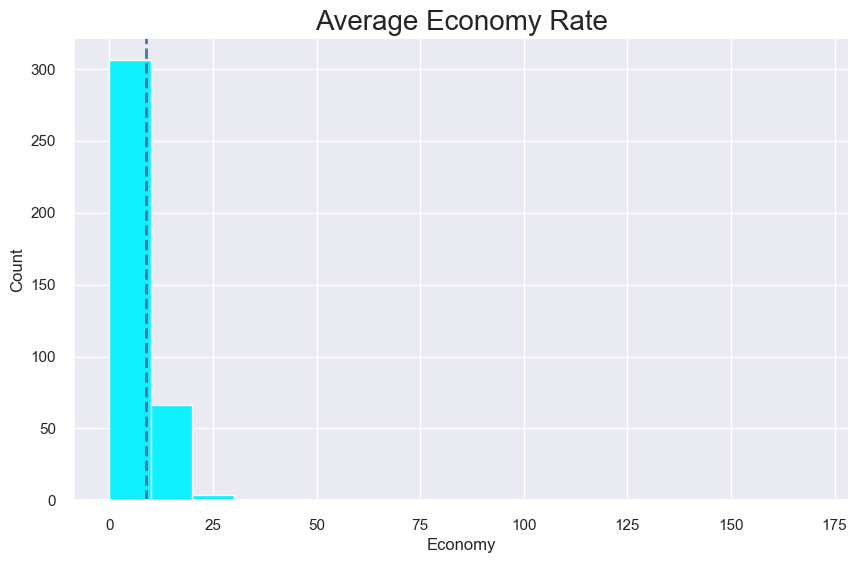

In [53]:
eco.reset_index(inplace=True)
plt.subplots(figsize=(10,6))
eco.replace([np.inf, -np.inf], np.nan,inplace=True)
plt.hist(eco['economy'],bins,histtype="bar",rwidth=1.5,color='#0ff0ff')
plt.xlabel('Economy')
plt.ylabel('Count')
plt.axvline(eco["economy"].mean(), color='b', linestyle='dashed', linewidth=2 )
plt.title("Average Economy Rate",fontsize=20)
plt.plot()
plt.show()

### 4.26 Which team has won most number of IPL finals?

Text(0.5, 1.0, 'FINAL PLAY/WIN TEAM')

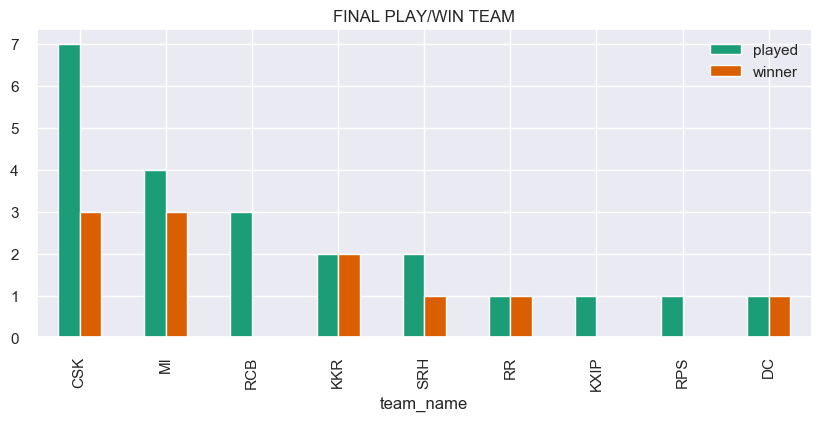

In [54]:
final_list = match_df.drop_duplicates(subset=['season'],keep = 'last')
team_names = pd.concat([final_list['team1'],final_list['team2']]).value_counts().reset_index()
team_names.columns = ['team_name','played']
final_winners_count = final_list['winner'].value_counts().reset_index()
team_names = team_names.merge(final_winners_count,left_on = 'team_name',right_on = 'index', how = 'outer')
team_names.drop(['index'],inplace = True,axis = 1)
team_names['winner'].fillna(0,inplace = True)
sns.set(palette='Dark2')
ax=team_names.set_index('team_name').plot(kind = 'bar', figsize=(10,4))
ax.set_title('FINAL PLAY/WIN TEAM' )

### 4.27 Is toss a factor in Final?

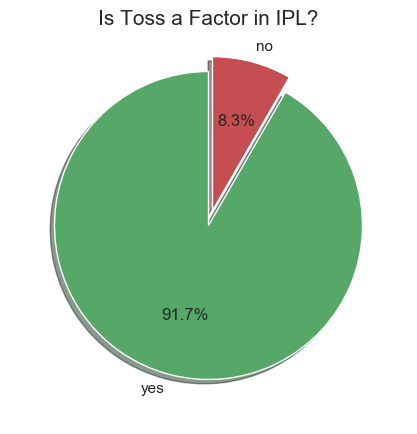

In [55]:
df=final_list[final_list['toss_winner']==final_list['winner']]
slices=[len(final_list),(9-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,colors=['G','R'],explode=(0,0.1),autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title("Is Toss a Factor in IPL?",fontsize=15)
plt.show()

 - We can see that winner of the toss in final match of IPL is very likely to win the final match too.